https://www.researchgate.net/figure/Proposed-deep-LSTM-network-architecture-for-HAR-classification_fig2_327891190

<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Motion Activity Classification Using Recurrent Neural Networks </centre></strong></h1>

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Model Architecture </centre></strong></h2>

#### 03.Model Development
**Objective:** Train a Tradicional RNN model on the preprocessed dataset.

**Model Training:** <br>
<br>
 - **Base Model:**
    + Defines the CNN architecture using Keras layers such as Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
    + Compiles the model with the Adam optimizer and categorical cross-entropy loss.
 
 - **Training and Evaluation:**
    + Utilizes EarlyStopping and ModelCheckpoint callbacks for efficient training.
    + Trains the model and evaluates its performance on the validation set.
    + Includes code to visualize training and validation accuracy over epochs.

---

Time Windowing: 
+ Segment the time series data into fixed-size windows (e.g., 1 second, 5 seconds).
+ Experiment with different window sizes to see their impact on model performance.

1. Model Architecture Design

+ Design RNN-based models using different types of layers:
    * Traditional RNN layers
    * Long Short-Term Memory (LSTM) layers
+ Define multiple architectures, e.g., a simple RNN, a single-layer LSTM, and a multi-layer LSTM.

2. Model Implementation

+ Implement the models using a deep learning framework such as TensorFlow or PyTorch.
+ Compile the models with appropriate loss functions and optimizers (e.g., categorical cross-entropy, Adam).

3. Model Training

+ Train the models on the training set with different configurations of RNN layers and time windows.
+ Use validation data to tune hyperparameters and avoid overfitting.
+ Save the model weights and training logs for analysis.

## **Carregamento das Bibliotecas Base**

In [19]:
import os 
import pandas as pd
import numpy as np
import time
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

## **Carregamento e Leitura do *Dataset* Pré-processado**

In [20]:
# Definir o caminho do arquivo relativo ao diretório do script
#file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'preprocessDataset.csv'

file_path = os.path.join(base_dir, file_name)
print(file_path)

C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets\preprocessDataset.csv


+ Utilização do método `read_csv()` para leitura do arquivo CSV com os dados pré-processados

In [21]:
df_motionSense = pd.read_csv(file_path)

+ Visualização das 5 primeiras linhas do *dataset* utilizando o método `head()`

In [22]:
df_motionSense.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category_encoded
0,1.021959,1.107385,0.417181,2.406195,-0.829476,0.358419,0.201954,0.523800,1.149716,0.877204,-0.498997,0.725271,0
1,1.021865,1.153671,0.405934,2.444120,-0.881869,0.356343,0.541955,0.276988,0.671182,0.661825,-0.067095,0.090614,0
2,1.021713,1.181012,0.401818,2.466163,-0.913179,0.354734,-0.092472,-0.047588,0.344296,0.066402,0.126678,-0.592361,0
3,1.014353,1.187365,0.404709,2.469880,-0.920496,0.324710,-0.019243,-0.750886,0.009028,0.011899,0.130769,0.042514,0
4,0.999076,1.189446,0.403053,2.467690,-0.922890,0.262797,0.070893,-0.656115,0.021537,0.604865,0.556535,-0.293948,0


## **Preparação do *Dataset* para treinar modelos de classificação de atividades baseado em RNN**

+ A função `prepare_data()` realiza o pré-processamento necessário para treinar um modelo de classificação de atividades baseado em RNNs. Este cria sequências de dados a partir da função `create_sequence()` e divide o conjunto de dados em treino e teste.

Esta divisão foi feita com base na função `train_test_split()` do scikit-learn que permite dividir o conjunto de dados em conjuntos de treino e teste. Este separa as *features* ('x_columns') e a *target* ('y_columns') com um tamanho de conjunto de teste de, neste caso, 20% (`test_size=0.2`), garantindo que os comprimentos dos conjuntos de treino para *features* e *targets* sejam os mesmos.

In [23]:
def prepare_data(df, window_length):
    """
    Preprocesses the dataset for training an RNN-based activity classification model.

    Args:
        df (pandas.DataFrame): The input dataset containing features and labels.
        window_length (int): The desired length of the time window for creating sequences.

    Returns:
        X_train, X_test, y_train, y_test: Processed training and testing data.
    """
    def create_sequences(data, target, window_size):
        sequences = []
        targets = []
        for i in range(len(data) - window_size):
            seq = data[i:i+window_size]
            label = target[i+window_size]
            sequences.append(seq)
            targets.append(label)
        return np.array(sequences), np.array(targets)
    
    y = df['category_encoded']
    X = df.drop(columns=['category_encoded'])
    
    X_seq, y_seq = create_sequences(X, y, window_length)
    
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, num_classes=y.nunique())
    y_test = to_categorical(y_test, num_classes=y.nunique())
    
    return X_train, X_test, y_train, y_test

In [28]:
NUM_FEATURES = df_motionSense.shape[1] - 1
NUM_CLASSES = df_motionSense['category_encoded'].nunique()

## **Definição de métodos de Regularização**

Os callbacks `EarlyStopping` e `ReduceLROnPlateau` são ferramentas essenciais para otimizar o treino de modelos de Deep Learning no TensorFlow Keras.

+ O `EarlyStopping` interrompe o treino quando uma métrica específica, como a perda de validação (`val_loss`), não mostra melhorias por um número definido de épocas (`patience=10`);    , prevenindo o sobreajuste.

+ O `ReduceLROnPlateau` ajusta dinamicamente a taxa de aprendizagem (`factor=0.2`) do otimizador se a métrica monitorizada (`val_loss`) não apresentar melhorias após um número específico de épocas (`patience=5`), permitindo uma convergência mais suave do modelo.

Usados em conjunto, estes callbacks melhoram a eficiência e a qualidade do treino, bem como ajudam a alcançar um equilíbrio entre o desempenho do modelo e a eficiência computacional.

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

## **Difinição da Arquitetura do Modelo**

+ Aplicação da função `prepare_data()` 

In [12]:
WINDOW_LENGTH = 20
    
X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

**Defining LSTM-based Deep Learning Model**

This code snippet utilizes the Keras library to build a deep learning model for sequence classification. The model includes an LSTM layer with 6 units, followed by a flattening layer, a dense layer with 128 neurons and ReLU activation, and a final output layer with softmax activation for multi-class classification. The model is compiled using categorical cross-entropy loss and the Adam optimizer. A summary of the model architecture is displayed.

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical


model_3 = Sequential()
model_3.add(LSTM(100, input_shape=(WINDOW_LENGTH,NUM_FEATURES)))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(NUM_CLASSES, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,603 (217.20 KB)

 Trainable params: 55,603 (217.20 KB)

 Non-trainable params: 0 (0.00 B)

**Training the LSTM Model**

This code trains the previously defined LSTM-based deep learning model. It uses the training sequences 'tx' and their corresponding one-hot encoded labels 'tty' with a specified number of epochs ('EPOCHS_SIZE') and batch size ('BATCH_SIZE'). The training progress and performance metrics are stored in the 'history' variable for analysis.

In [14]:
start_time = time.time()

history_1 = model_3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - accuracy: 0.9080 - loss: 0.2622 - val_accuracy: 0.9708 - val_loss: 0.0934 - learning_rate: 0.0010
Epoch 2/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 145s 9ms/step - accuracy: 0.9714 - loss: 0.0914 - val_accuracy: 0.9782 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 3/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 154s 10ms/step - accuracy: 0.9795 - loss: 0.0653 - val_accuracy: 0.9851 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 4/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 193s 12ms/step - accuracy: 0.9843 - loss: 0.0477 - val_accuracy: 0.9870 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 5/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 95s 6ms/step - accuracy: 0.9878 - loss: 0.0376 - val_accuracy: 0.9881 - val_loss: 0.0343 - learning_rate: 0.0010
Epoch 6/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 328s 21ms/step - accuracy: 0.9899 - loss: 0.0302 - val_accuracy: 0.9912 - val_loss: 0.0265 - learning_rate: 0.0010
Epoch 7/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 195s 1

In [ ]:
os.makedirs('models/model_3/h1', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/model_3/h1/history_1.pkl', 'wb') as f:
    pickle.dump(history_1.history, f)

# Guardar o modelo treinado
model_3.save('models/model_1/model_1.h5')

**Evaluating the LSTM Model**

This following code evaluates the trained LSTM model using the validation sequences 'vx' and their corresponding one-hot encoded labels 'vvy' with a batch size of 'BATCH_SIZE'. It calculates and returns evaluation metrics to assess the model's performance on the validation data.

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/model_3/h1/history_1.pkl'
model_path = 'models/model_3/model_3.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history_1 = pickle.load(f)

# Carregar o modelo treinado
model_3 = load_model(model_path)

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9956 - loss: 0.0140
Test loss: 0.014517839066684246, Test accuracy: 0.9954926371574402


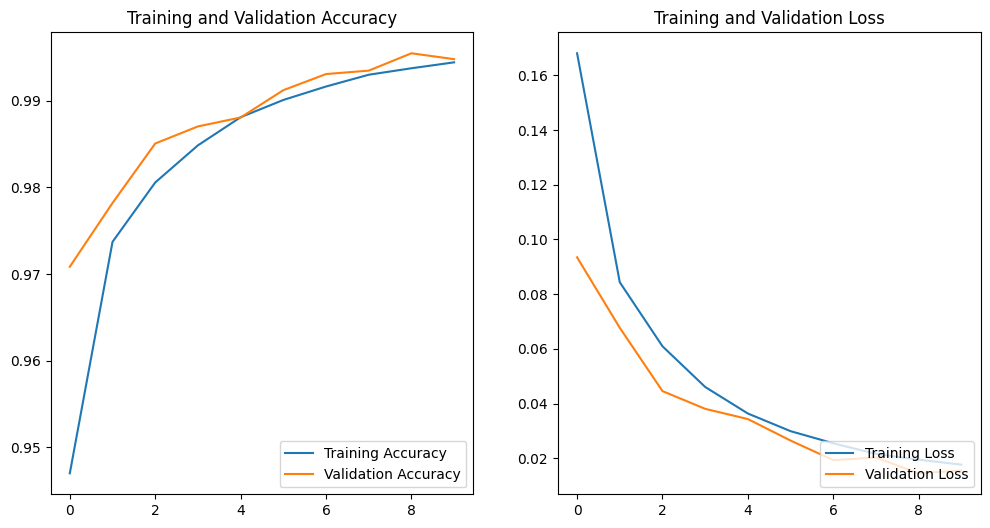

In [15]:
# Evaluate the model2
import matplotlib.pyplot as plt

loss, accuracy = model_3.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]
 
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
 
 
EPOCHS = len(acc)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

### **Maus resultados:**

In [ ]:
model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))
model.add(LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Treinar o modelo 2 teste
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

5253/5253 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 1.0000 - loss: 2.1159e-04
Test loss: 0.00023821408103685826, Test accuracy: 0.9999880790710449


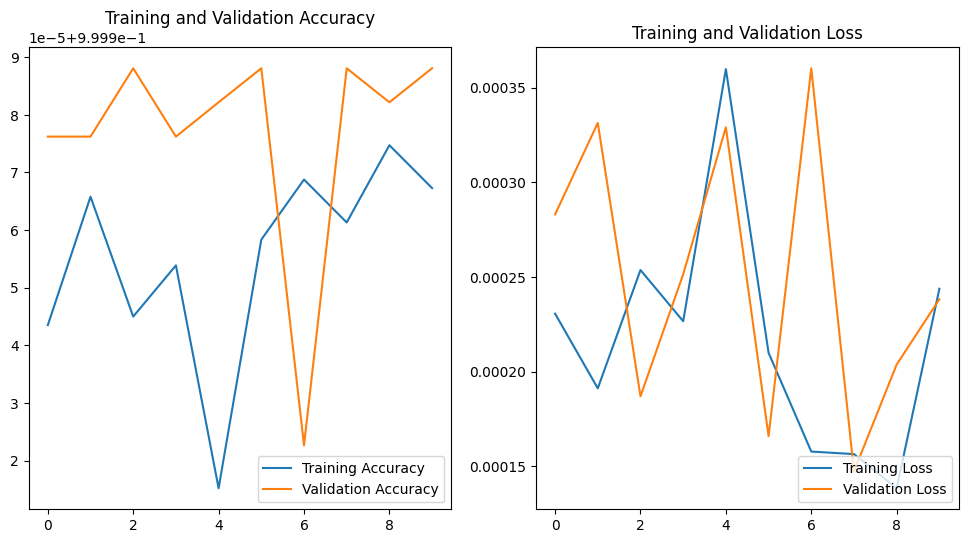

In [124]:
# Evaluate the model do que está comentado 
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

### **Bons resultados**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical

model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))
model.add(LSTM(50, return_sequences=False))  # Camada LSTM com 50 unidades
#model.add()
model.add(Dense(50, activation='relu'))      # Camada densa intermediária com 50 unidades
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Camada de saída com softmax para classificação

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,303 (59.78 KB)

 Trainable params: 15,303 (59.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 217s 10ms/step - accuracy: 0.9674 - loss: 0.0922 - val_accuracy: 0.9921 - val_loss: 0.0241
Epoch 2/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 262s 12ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9943 - val_loss: 0.0175
Epoch 3/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 209s 10ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9963 - val_loss: 0.0112
Epoch 4/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 251s 12ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9972 - val_loss: 0.0086
Epoch 5/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 262s 12ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9971 - val_loss: 0.0086
Epoch 6/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 365s 17ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9980 - val_loss: 0.0063
Epoch 7/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 149s 7ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9981 - val_loss: 0.0056
Epoch 8/10
21009/21009 ━━━━━━━━━━━━━━━━━━━━ 180s 6ms/ste

5253/5253 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9985 - loss: 0.0044
Test loss: 0.0047078742645680904, Test accuracy: 0.9985065460205078


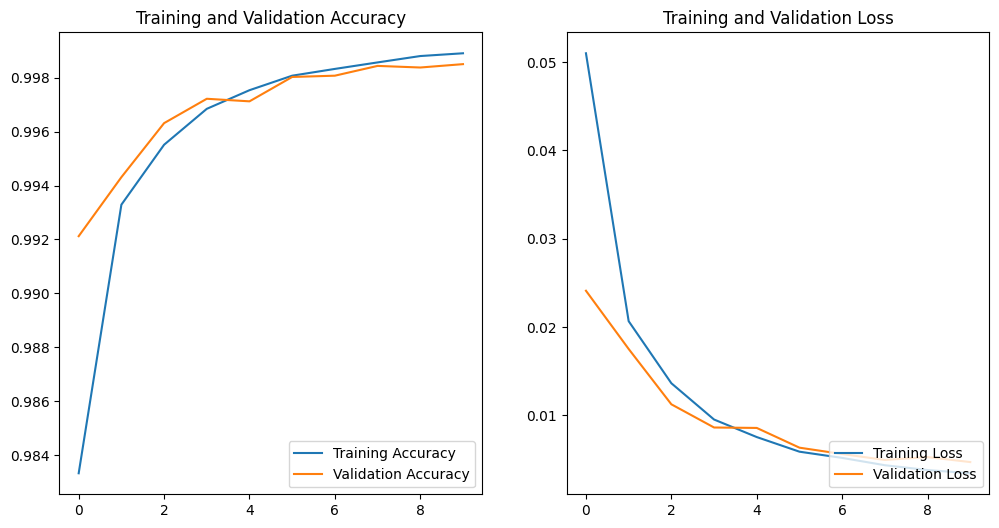

In [ ]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

**Defining LSTM-based Deep Learning Model**

This code snippet utilizes the Keras library to build a deep learning model for sequence classification. The model includes an LSTM layer with 6 units, followed by a flattening layer, a dense layer with 128 neurons and ReLU activation, and a final output layer with softmax activation for multi-class classification. The model is compiled using categorical cross-entropy loss and the Adam optimizer. A summary of the model architecture is displayed.

In [25]:
WINDOW_LENGTH = 50
    
X_train, X_test, y_train, y_test = prepare_data(df_motionSense, WINDOW_LENGTH)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Defina o número de unidades LSTM e outras configurações
num_units = 30
dropout_rate = 0.2

# Crie o modelo
model = Sequential()

# Camadas LSTM
model.add(LSTM(units=num_units, input_shape=(WINDOW_LENGTH, NUM_FEATURES), return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=num_units, return_sequences=False))
model.add(Dropout(dropout_rate))

# Camada totalmente conectada
model.add(Dense(units=15, activation='relu'))

# Normalização em lote
model.add(BatchNormalization())

# Camada de saída
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

# Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 30)         │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 30)             │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,053 (50.99 KB)

 Trainable params: 13,023 (50.87 KB)

 Non-trainable params: 30 (120.00 B)

In [32]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

end_time = time.time()
execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Epoch 1/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 240s 15ms/step - accuracy: 0.9315 - loss: 0.2101 - val_accuracy: 0.9823 - val_loss: 0.0582 - learning_rate: 0.0010
Epoch 2/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 205s 13ms/step - accuracy: 0.9815 - loss: 0.0635 - val_accuracy: 0.9894 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 3/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 205s 13ms/step - accuracy: 0.9886 - loss: 0.0383 - val_accuracy: 0.9928 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 4/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 204s 13ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9957 - val_loss: 0.0145 - learning_rate: 0.0010
Epoch 5/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 208s 13ms/step - accuracy: 0.9940 - loss: 0.0213 - val_accuracy: 0.9969 - val_loss: 0.0102 - learning_rate: 0.0010
Epoch 6/100
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 206s 13ms/step - accuracy: 0.9955 - loss: 0.0163 - val_accuracy: 0.9965 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 7/100
15835/15835 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
os.makedirs('models/lstmmulti/h1', exist_ok=True)

# Guardar o histórico do treinamento
with open('models/lstmmulti/h1/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Guardar o modelo treinado
model.save('models/lstmmulti/model.h5')

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Caminho para os arquivos
history_path = 'models/lstmmulti/h1/history.pkl'
model_path = 'models/lstmmulti/model.h5'

# Carregar o histórico do treinamento
with open(history_path, 'rb') as f:
    history = pickle.load(f)

# Carregar o modelo treinado
model = load_model(model_path)